# Check characteristics of participants

In [3]:
import pandas as pd

sampled_df = pd.read_csv("sampled_metadata.csv")

## Participants per group

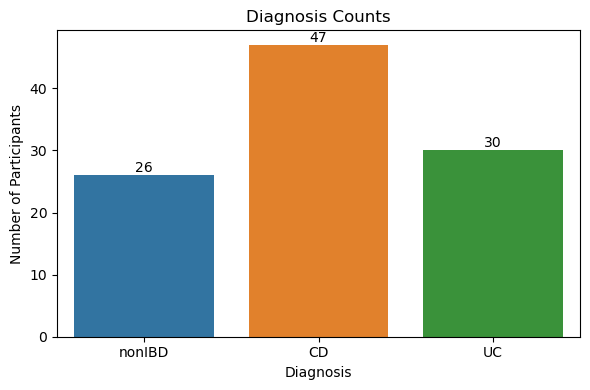

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop duplicates to get one row per participant
sampled_df_unique = sampled_df.drop_duplicates(subset="Participant ID")


# Specify desired order
diagnosis_order = ["nonIBD", "CD", "UC"]

# Step 3: Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=sampled_df_unique, x="diagnosis", order=diagnosis_order)
plt.title("Diagnosis Counts")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Participants")

# Step 4: Add value labels above each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Medical characteristics per group

In [6]:

# Step 2: Group by diagnosis and summarize
summary = sampled_df_unique.groupby("diagnosis").agg({
    "Age at diagnosis": "mean",         # Mean age
    "sex": lambda x: x.value_counts().to_dict(),  # Gender distribution
    "site_name": lambda x: x.value_counts().to_dict(),  # Site distribution
    "Antibiotics": lambda x: x.value_counts().to_dict(),  # Antibiotic history
    "Chemotherapy": lambda x: x.value_counts().to_dict()  # Chemo history
}).reset_index()

summary




In [9]:
# Step 2: Create pivot table
pivot = sampled_df_unique.pivot_table(
    index="site_name",
    columns="diagnosis",
    values="Participant ID",
    aggfunc="count",
    fill_value=0
)

# Step 3: Add total row
total_row = pd.DataFrame(pivot.sum()).T
total_row.index = ["Total"]

# Step 4: Combine total row and original pivot
pivot_with_total = pd.concat([total_row, pivot])

pivot_with_total[]

diagnosis,CD,UC,nonIBD
Total,47,30,26
Cedars-Sinai,15,11,1
Cincinnati,14,7,9
Emory,3,1,0
MGH,7,6,13
MGH Pediatrics,8,5,3


In [12]:

# Step 2: Group by diagnosis and summarize
summary = sampled_df_unique.groupby("diagnosis").agg({
    "Participant ID": "count",
    "Age at diagnosis": "mean",
    "sex": lambda x: x.value_counts().to_dict(),
    "Antibiotics": lambda x: x.value_counts().to_dict(),
    "Chemotherapy": lambda x: x.value_counts().to_dict()
}).rename(columns={
    "Participant ID": "Total Participants",
    "Age at diagnosis": "Mean Age at diagnosis"
})

# Step 3: Transpose to make diagnosis groups the columns
summary_transposed = summary.T  # flip rows/columns
summary_transposed.columns.name = None  # remove the name on columns for cleaner display

summary_transposed


,CD,UC,nonIBD
Total Participants,47,30,26
Mean Age,20.0,23.066667,NaN
sex,"{'Male': 24, 'Female': 23}","{'Female': 18, 'Male': 12}","{'Male': 15, 'Female': 11}"
Antibiotics,"{'No': 41, 'Yes': 6}","{'No': 29, 'Yes': 1}","{'No': 24, 'Yes': 2}"
Chemotherapy,"{'No': 44, 'Yes': 3}","{'No': 28, 'Yes': 2}",{'No': 26}


In [19]:
# Step 1: Drop duplicate participants
sampled_df_unique = sampled_df.drop_duplicates(subset="Participant ID")

# Step 2: Summary metadata per diagnosis
summary = sampled_df_unique.groupby("diagnosis").agg({
    "Participant ID": "count",
    "consent_age": "mean",
    "Age at diagnosis": "mean",
    "sex": lambda x: x.value_counts().to_dict(),
    "Antibiotics": lambda x: x.value_counts().to_dict(),
    "Chemotherapy": lambda x: x.value_counts().to_dict()
}).rename(columns={
    "Participant ID": "Total Participants",
    "consent_age": "Mean Age",
    "Age at diagnosis": "Mean Age at Diagnosis"
})

summary_transposed = summary.T
summary_transposed.columns.name = None

# Step 3: Site-level counts per diagnosis with total row
pivot = sampled_df_unique.pivot_table(
    index="site_name",
    columns="diagnosis",
    values="Participant ID",
    aggfunc="count",
    fill_value=0
)

# Add total row and rename it to 'Sites'
total_row = pd.DataFrame(pivot.sum()).T
total_row.index = ["Sites"]

pivot_with_total = pd.concat([total_row, pivot])

# Set values in 'Sites' row to blank
pivot_with_total.loc["Sites"] = ""

# Step 4: Combine both into one table (matching column structure)
pivot_with_total = pivot_with_total[summary_transposed.columns]
combined = pd.concat([summary_transposed, pivot_with_total])

# Show final combined table
combined


,CD,UC,nonIBD
Total Participants,47,30,26
Mean Age,26.108696,28.6,29.653846
Mean Age at Diagnosis,20.0,23.066667,NaN
sex,"{'Male': 24, 'Female': 23}","{'Female': 18, 'Male': 12}","{'Male': 15, 'Female': 11}"
Antibiotics,"{'No': 41, 'Yes': 6}","{'No': 29, 'Yes': 1}","{'No': 24, 'Yes': 2}"
Chemotherapy,"{'No': 44, 'Yes': 3}","{'No': 28, 'Yes': 2}",{'No': 26}
Sites,,,
Cedars-Sinai,15,11,1
Cincinnati,14,7,9
Emory,3,1,0


## Contig quality check

In [ ]:
import utils.parser as parser

for line in parser.parse_contigs("/home/robcli/braakman/001/data/assemblies/hmp2/CSM5MCWG_contigs.fna.gz"):
    print(line)
    sys.exit()